# sklearn 관련 Linear Regression

In [1]:
# 패키지설치

from sklearn.linear_model import LinearRegression # model object
from sklearn.model_selection import train_test_split # train/test split
from sklearn.metrics import mean_squared_error, r2_score # model 평가
from sklearn.datasets import load_diabetes #dataset
import numpy as np # 숫자 처리


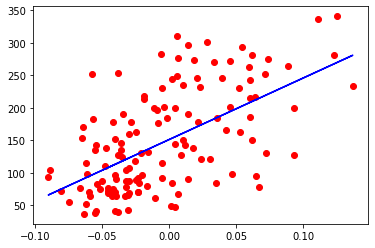

In [2]:


#####################################
########### diabetes ################
#####################################
# 단순선형회귀 : x(1) -> y

# 1. dataset load
X, y = load_diabetes(return_X_y = True) # x,y 변수를 동시에 분할해서 return 
X.shape # (442,10)
y.shape # (442,)
y.mean() # 152.13348416289594



# 2. x, y 변수
# X (bmi : 비만도지수 : 3번째칼럼) -> y 
x_bmi = X[:,2]
x_bmi.shape # (442,)

# 1d -> 2d reshape : model 동작을 위해
x_bmi = x_bmi.reshape(442,1)



# 3. model 생성 : object -> traing -> model
obj = LinearRegression() # 생성자 -> object
model = obj.fit(x_bmi,y) # (X,y) -> model

# y 예측치
y_pred = model.predict(x_bmi) # predict(X)
y_pred.shape # (442,)
y.shape # (442,)



# 4. model 평가 : MSE(정규화), r2_score(비정규화)
MSE = mean_squared_error(y, y_pred) # (y 정답, y 예측치)
score = r2_score(y, y_pred)
MSE # 3890.4565854612724 : 정규화가 되어있지 않아 큰 의미가 없음
score # 0.3439237602253803




# 5. dataset split(70:30)
x_train, x_test, y_train, y_test = train_test_split(x_bmi,y,test_size=0.3)
x_train.shape # (309,1)
x_test.shape # (133,1)
y_train.shape # (309,)
y_test.shape # (133,)

# model 생성
obj = LinearRegression() # 생성자 -> object
model = obj.fit(x_train, y_train)
y_pred = model.predict(x_test)

# model 평가 : MSE(정규화), r2_score(비정규화)
MSE = mean_squared_error(y_test, y_pred) # (y 정답, y 예측치)
score = r2_score(y_test, y_pred)
MSE # 3585.156953616726 
score # 0.3125057627104342

y_test[:10]
y_pred[:10]

import pandas as pd

df = pd.DataFrame({'y_true':y_test,'y_pred':y_pred})
cor = df['y_true'].corr(df['y_pred'])
cor # 0.5649315897785665

import matplotlib.pyplot as plt
plt.plot(x_test, y_test, 'ro') # 산점도
plt.plot(x_test, y_pred,'b-') # 회귀선
plt.show()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


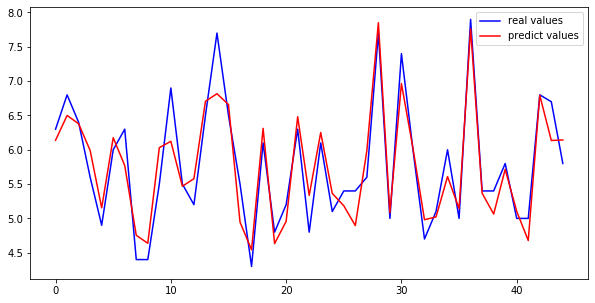

In [4]:

####################################
########### iris. csv ##############
####################################
# 다중회귀모델 : y(1) <- x(2-4)

# 1. dataset load 
iris = pd.read_csv('C:/IITT/4_Python-II/workplace/data/iris.csv')
iris.info()
'''
 0   Sepal.Length  150 non-null    float64 -> Y
 1   Sepal.Width   150 non-null    float64 -> X1
 2   Petal.Length  150 non-null    float64 -> X2
 3   Petal.Width   150 non-null    float64 -> X3
 4   Species       150 non-null    object 
'''

# 2. x,y 변수 선택
cols = list(iris.columns)
cols

x_cols = cols[1:4]
y_cols = cols[0]


# 3. dataset split (70:30)
iris_train, iris_test = train_test_split(iris,test_size=0.3, random_state=123)
'''
test_size : 검정데이터셋 비율(default = 0.25)
random_state : sampling seed 값 -> random x
'''
iris_train.shape # (105,5)
iris_test.shape # (45,5)

iris_train.head()
iris_test.head()


# 4. model 생성
lr = LinearRegression()
model = lr.fit(iris_train[x_cols],iris_train[y_cols])
model


# 5. model 평가 : test data
y_pred = model.predict(X=iris_test[x_cols]) # 예측치
y_true = iris_test[y_cols] # 관측치(정답)

y_true.min() # 4.3
y_true.max() # 7.9


# 평균제곱오차 : mean((y_true - y_pred)**2)
MSE = mean_squared_error(y_true,y_pred)
# 결정계수 : 1 기준
r2 = r2_score(y_true, y_pred)

MSE # 0.11633863200224723
r2 # 0.8546807657451759


# y_true vs y_pred 시각화
type(y_true) # pandas.core.series.Series
type(y_pred) # numpy.ndarray
y_true = np.array(y_true)
# 만약 pd.Series로 맞추고 싶다면 index값도 맞춰줘야함


# 시각화
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,5))
chart = fig.subplots()
chart.plot(y_true, c='b', label='real values')
chart.plot(y_pred, c='r', label='predict values')
plt.legend(loc='best')
plt.show()

